# SYD DAT 8 Homework 2 - Visualisation and Regression

## Homework - Due Friday 30th June

### NB - homework was submitted 16th of July

#### Setup
* Signup for an AWS account

#### Communication
* Imagine you are trying to explain to someone what Linear Regression is - but they have no programming/maths experience? How would you explain the overall process, what a p-value means and what R-Squared means?
* Read the paper [Useful things to know about machine learning]( https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf). 
    * What have we covered so far from this paper? 
    * Explain sections 6-13 in your own words

#### Machine Learning
* Describe 3 ways we can select what features to use in a model
* Complete the first 3 exercises from Chapter 3 of Introduction to Statistical Learning in Python

#### Course Project
* For the following setup a new github repository for your project and share it with Alasdair and Ian over Slack.
* Load the data you have gathered for your project into Python and run some summary statistics over the data. Are there any interesting features of the data that jump out? (Include the code)
* Draft/Sketch (or wireframe) some data visualisations that would be useful for you to explore your data set
* Are there any regresion or clustering techniques you could use in your project? Write them down (with the corresponding scikit learn function) and what you think you would get out of it. Try it out if you get a chance.


**Instructions: copy this file and append your name in the filename, e.g. Homework2_ian_hansel.ipynb.
Then commit this in your local repository, push it to your github account and create a pull request so I can see your work. Remeber if you get stuck to look at the slides going over Fork, Clone, Commit, Push and Pull request.**

### Setup
#### Sign up for an AWS Account
https://us-east-2.console.aws.amazon.com/console/home?region=us-east-2#
Account id: 511004532925

#### Sign up for a Google Cloud Account
https://console.cloud.google.com/home/dashboard?project=vernal-buffer-172320
Project ID: vernal-buffer-172320
No. 1079400889046

### Communication

#### Plain English Linear Regression

Take a series of measurements for which we want to make a prediction on.

A good example might be 'blood pressure' and 'age'.

Both of them are "continuous", or numbers that can have any value from minus infinity to infinity.
One of these numbers is the 'target' we want to predict, and the other is a 'feature' we will use to make our prediction. 

In the example, the target is **blood pressure**, and the feature is **age**.

A fast, easy, and highly interpretable method we can use to make this prediction is called **'linear regression'**. 

Linear regression, in a nut shell, assumes that a prediction can be made through 'fitting' a straight line through the points, and using the 'parameters' of this line, like the gradient and the intercept, to predict the target 'y' for any set of n features 'x1, x2, ..., xn'

i.e.
$y = \beta_0 + \beta_1x$

Where
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Now, a lot of people (myself included) first learn how to do this through 'visual inspection', where they plot the points and estimate the 'line of best fit'. 

e.g.

In [1]:
# Setup packages
import pandas as pd
# ! pip install seaborn
import seaborn as sns
%matplotlib inline

In [2]:
# Import some data
Age_BloodPressure = pd.read_csv('Age_BloodPressure.csv',header=0,index_col=0)

In [14]:
Age_BloodPressure.shape

(30, 3)

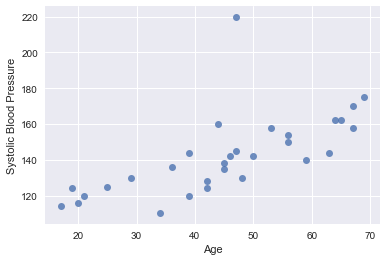

In [3]:
# Plot the Data
# X = Age_BloodPressure['Age']
# Y = Age_BloodPressure['Systolic Blood Pressure']
sns.regplot(x='Age', y="Systolic Blood Pressure", data=Age_BloodPressure, fit_reg=False)

In [22]:
# Estimate a line that will cross these points, and calculate estimates based on this. 
Intercept = 80
Coefficient = 1.5 #mmHg/year
f = lambda x: Coefficient*x + Intercept
Y_Est = Age_BloodPressure.Age.apply(f)

In [40]:
# Concatenate the estimate to the data frame
Age_BloodPressure['Label'] = 'Data'
Age_BP_Est = pd.DataFrame(columns=['Age','Systolic Blood Pressure','Label'])
Age_BP_Est['Age'] = Age_BloodPressure.Age
Age_BP_Est['Systolic Blood Pressure'] = Age_BloodPressure.Age.apply(f)
Age_BP_Est['Label'] = 'Estimate'
Age_BP_Overlay = pd.concat([Age_BloodPressure,Age_BP_Est],axis=0,ignore_index=True)
print(Age_BP_Overlay.head())
print(Age_BP_Overlay.tail())

   Age  Systolic Blood Pressure Label
0   39                    144.0  Data
1   47                    220.0  Data
2   45                    138.0  Data
3   47                    145.0  Data
4   65                    162.0  Data
    Age  Systolic Blood Pressure     Label
55   53                    159.5  Estimate
56   63                    174.5  Estimate
57   29                    123.5  Estimate
58   25                    117.5  Estimate
59   69                    183.5  Estimate


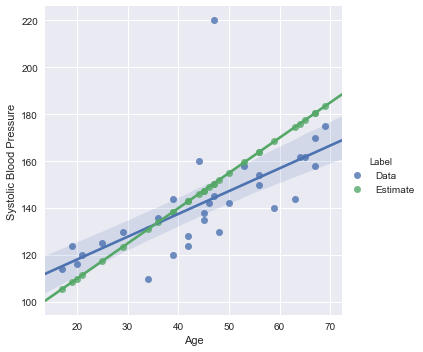

In [42]:
## Plot the estimate over the data
sns.lmplot(x='Age', y="Systolic Blood Pressure", hue='Label',data=Age_BP_Overlay)
# There are 2 estimates here - one from visual inspection, and the other from computation - see how far we were off!!!

Visual inspection is slow and prone to error. <br>
One way we can take advantage of computers is to make many estimates of the interpect and the gradient, and find out how well it 'fits' the data by seeing how much each predicted value varies from the measured value. <br>
We can tell how much it varies from the measured value by calculating the **sum of squared residuals** (*SS*<sub>residuals</sub>) across all points, using the equation below. <br>
The **best model** produces estimates with the smallest *SS*<sub>residuals</sub>

![Alt text](estimating_coefficients.png)

A linear regression model can be applied to the earlier data in an efficient manner using a package called Statsmodel

In [48]:
Data = Age_BloodPressure
Data.rename(columns={'Systolic Blood Pressure': 'Systolic_Blood_Pressure'}, inplace=True)
import statsmodels.formula.api as smf
lm = smf.ols(formula='Systolic_Blood_Pressure ~ Age', data=Data).fit()
lm.params

Intercept    98.714718
Age           0.970870
dtype: float64

Using this model to predict a blood pressure value is trivial - i.e. for age 30:

In [53]:
print(str(0.970870*30+98.714718) + ' mmHg')

127.84081800000001 mmHg


Once we have fitted a model to the data, the question then becomes - what's our confidence in the model, and it's predictions? <br>
This is quite important, as we're only looking at a sample of the data, which could be quite noisy, and we don't want to draw spurious conclusions. <br>
At this point, it helps to test our assumption that there's a linear relationship between the target and the feature in our data. We can do this by comparing our predictions against what we'd expect to see if there was no relationship between Blood Pressure and Age - i.e. the model's coefficient of age is zero. <br>
We can make this comparison through what statisticians title a 'hypoethesis' test, where the **null hypothesis** is that the coefficient is zero, and the **alternative hypothesis** is that the coefficient is not zero. <br>
This test makes many assumptions, like the estimates of this coefficient adopting a 'normal' distribution based on what samples we use to estimate it. How this test is calculated is outlined here - https://onlinecourses.science.psu.edu/statprogram/node/138 <br>
The output of this hypothesis test is a **P-value**, or the probability that this coefficient could have been calculated based off data where there's no relationship. <br>
How do we interpret the outcome of the test using the P-value? This involves using a **significance** cut off, which is typically 5% (or 0.05). So if the P-value of a coefficient is below 0.05, we reject the null hypothesis, and move ahead with predictions using this model. If the P-value is above 0.05, we accept the null hypothesis, and throw out our assumption of a linear relationship. <br>
<br>
What are the results of this test for Age-BloodPressure?

In [54]:
lm.pvalues

Intercept    1.280927e-10
Age          7.867263e-05
dtype: float64

As the **P-value** for both coefficients are less than 0.05, we can move ahead with the assumption that there's a linear relationship with Age and Blood Pressure.

We can also use some basic statistics to express the detail of the relationship between age and blood pressure (the coefficient and intercept), with some confidence that we're getting the value right given variations with sampling (i.e. 95% of the time the value will be within this interval). 

In [55]:
lm.conf_int()

,0,1
Intercept,78.229689,119.199747
Age,0.540263,1.401478


Looking at the model's parameters and confidence intervals togther: <br>
*Systolic Blood Pressure varies linearly by age by 1.0 +/- 0.4 mmHg/year, with an intercept of 100 +/- 20 mmHg (95% confidence)*

A final way of looking at the performance of a model is through assessing the **Coefficient of Determination**, or R<sup>2</sup> <br>
This looks at how well the model fits the data, compared to the average of the data. <br>
I.e. we calculate the "total sum of squares" by looking at the difference of each data point from the mean (the total variance). <br>
We then calculate the "residual sum of squares" by looking at the difference of each data point from the model's prediction. <br>
We divide the residual sum of squares by the total sum of squares, and subtract it from 1, to see how much of the variance our model explains. <br>
The closer this parameter is to 1, the better the performance of the model in explaining our data. 

![Alt text](Coeff_Determination.png)

In [60]:
# What's the R^2 of our blood pressure linear model?
lm.rsquared
# What a surprise - maybe we need more data, or a linear model is not the best one for this phenomena. 

0.43239473192759525

# Reading: Useful things to know about machine learning
**What have we covered?**
Most concepts of sections 1 and 2, arranged in a novel taxonomy of Table 1. <br>Great reinforcement of "Generalization" being the end goal in section 3, and holdouts being mandatory (hope I'm never in the situation of using test data to tune an algorithm).<br>
Some really novel abstractions in section 4 - like relating this all back to induction, and how some assumptions (like smoothing) in practice can act as a lever transforming a small amount of input knowledge into a large amount of output knowledge... <br>

QUOTE?  "Programming, like all engineering, is a lot of work:
we have to build everything from scratch. Learning is more
like farming, which lets nature do most of the work. Farmers
combine seeds with nutrients to grow crops. Learners
combine knowledge with data to grow programs"

We have also covered overfitting and the bias variance trade-off - 
Overfitting as hallucination - "encoding random quirks of the data".
Bias - Tendancy to consistently learn the same wrong thing.
Variance - Tendency to learn random things irrespective of the signal.
No free lunch - easy to avoid overfitting (variance) by falling into the opposite error of underfitting (bias). Simultaneously avoiding both requires a perfect classifier - short of knowing in advance, there is no single technique that will always do best (so no free lunch).

False discovery rate - multiple testing - worth exploring further (along with concepts of power).

**Section 6 Summary**
*Intuition fails in high dimensions* <br> 
A large number of features introduce the following challenges to modelling:
1. as the number of features increase, the less input space a given training will cover, and the more the model will need to generalize. 
2. The more features there are, the more likely there are irrelevant features that introduce noise to the model. 
3. The more features there are, the more alike a sample looks like (choice of nearest neighbours becomes random). 
4. Our intuitions apply to three dimensions, and we are lost in high dimensions.
Some of these issues can be counteracted by non-uniformity in a sample's distribution, or through using processing techniques that reduce the number of dimensions (i.e. PCA).
The take home is that adding new features is 'not harmless' and can introduce real complications in machine learning.

**Section 7 Summary**
*Theoretical guarantees are not what they seem*
Research is full of guarantees, like the number of samples needed for generalization. 
But machine learning is induction, and historically induction has been known as a far riskier way to knowledge than other reasoning methods like deduction.
Furthermore these guarantees at times argue for more samples than needed in practice.
So these guarantees are not useful practically - they act more as tools for research.
<color=red> Buyer beware: Just because a learner has a theoretical justification and works in practice doesn't mean the theory is important for the practice </color>

**Section 8 Summary**
*Feature Engineering is the Key*
The most important difference between a successful and failed ML project is the features used.
1. Most effort in a typical project goes into data wrangling - it's the bit that's domain specific, and hasn't been engineered (unlike the learners).
2. ML tends to be an interative process of running the learning, analyzing the results, modifying the data and the learner, and repeating. 
3. Features tend to be domain specific, may be material in combination, and may introduce resource cost or risks of overfitting.


**Section 9 Summary**
*More Data beats a cleverer algorithm*
Machine learning is all about letting data do the heavy lifting in designing an algorithm.
The rule of thumb is - a dumb algorithm with lots of data will beat a clever algorithm with modest amounts of it. So try the simplest learners first (naive Bayes before logistic, k-nearest neighbor before support vector machines)
Machine Learning has three limited resources to juggle - time, memory, and training data. Today, time is the bottle-neck - mountains of data are available, but there isn't enough time to process it, so it goes unused. And in terms of time, HUman Cycles, not CPU Cycles, is the key bottle-neck. Complex classifiers can take too long to learn.
"All learners essentially work by grouping nearby examples into the same class - the key difference is NEARBY".

Human effort saved and insight gained...

**Section 10 Summary**
*Learn many models - not just one*
Old models used to involve one learner. THese days models involve ensembles.
Reeduce the variance with a slight increase in bias.
Bagging - combine the results and pick by voting.
Boosting - training examples have weights which are varied so that each new classifier focuses on the examples that the previous ones tended to get wrong.
Winner and runner up of Netflix prize had ensembles of over 100 learners.

**Section 11 Summary**
*Simplicity does not imply accuracy*
Given 2 models of similar training accuracy, the simpler of the two will not have lower test accuracy - there is no free lunch.

**Section 12 Summary**
*Representable does not imply learnable*
Lots of jargon here - representation roughly matches the features, target, and algorithm applied to the data.
This section may be trying to warn against becoming too attached to one representation (i.e. always using random forests).

**Section 13 Summary**
*Correlation does not imply causation*
Yep. Suppose it needed a mention for compleness.
Nice distinction raised - most learners are applied to observational data, where the variables are not under control by the learner, unlike experimental data.
So the outcome is always a correlation, that needs further investigation or experimentation to confirm into a causation.


### Machine Learning
#### Three ways to select features

Three ways to select features include: <br>
    1. Applying your deep knowledge of the problem domain 
    2. Selecting features based on Chi squared/information gain/correlation coefficients
    3. Using regularization methods that bias the model to less features/complexity during its construction
        a. LASSO
        b. Elastic Net
        c. Ridge Regression


# ISLR Chapter 3 Exercise 1-3 in Python!

##### Questions
1. Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.
2. Carefully explain the differences between the KNN classifier and KNN regression methods.
3. Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get βˆ0 = 50, βˆ1 = 2 0 , βˆ 2 = 0 . 0 7 , βˆ 3 = 3 5 , βˆ 4 = 0 . 0 1 , βˆ 5 = − 1 0 . <br>
a) Which answer is correct, and why? <br>
    i. For a fixed value of IQ and GPA ,males earn more on average than females <br>
    ii. For a fixed value of IQ and GPA, females earn more on average than males. <br>
    iii. ForafixedvalueofIQandGPA,malesearnmoreonaverage than females provided that the GPA is high enough. <br>
    iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough. <br>
(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0. <br>
(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.


**Question 3** <br>
a) iii is true - beta^3 and beta^5 suggest that provided a Male has a GPA greater than 1, they will receive a higher starting salary. 

In [62]:
# b)
50+(20*4)+(110*0.07)+(1*35)+(4*110*0.01)+(4*1*-10)

137.1

c) False - the way to evaluate the evidence of an interaction effect is through assessing the p-value of this parameter, against a significance threshold - i.e. if p>0.05, then we can dismiss this interaction. 

**Question 1** <br>
Table 3.4 (below) shows the model results for multiple-linear regression of sales and advertising spend. <br>
The null hypothesis for this regression model is that there is no linear relationship between a given feature (TV, radio, newspaper advertising spend) and the target of Sales, when the other features are held fixed. <br>
Based on the p-values summarized in this table, there is a linear relationship between Sales and TV, and between Sales and radio. There is no linear relationship between Sales and Newspaper.

![Alt text](Table_3-4.png)

**Question 2** <br>
"K nearest neighbours" is a non-parametric method that does not assume a linear relationship between the Target and Input variables. It works by estimating the posterior probability of a test variable. <br>
The essence of these methods is to specify how many neighbors have a vote in determining a prediction, and then assign a class or a value based on the predominant class or value in the neighbors that a given point is closest too. 

![Alt text](KNN_method.jpeg)

Referencing the figure above, X<sub><ital>j</ital></sub> is compared with 5 neighbours. <br>
The predominant class or value is w<sub>1</sub>, as 4 out of 5 nearest neighbors have this value. <br>
Figure source: http://www.byclb.com/TR/Tutorials/neural_networks/ch11_1.htm

As for specific differences between the methods used in classification vs regression: screen shots are included below, but this seems to be the difference between calculating a class' probability vs the average of a value. 

![Alt Text](KNN_Classification.png)

![Alt Text](KNN_Regression.png)

### Course Project

#### Instructions
**Course Project**
For the following setup a new github repository for your project and share it with Alasdair and Ian over Slack.
Load the data you have gathered for your project into Python and run some summary statistics over the data. Are there any interesting features of the data that jump out? (Include the code)
Draft/Sketch (or wireframe) some data visualisations that would be useful for you to explore your data set
Are there any regresion or clustering techniques you could use in your project? Write them down (with the corresponding scikit learn function) and what you think you would get out of it. Try it out if you get a chance.

#### Github Repo Details
github.com/GeoffPidcock/Tradeshow